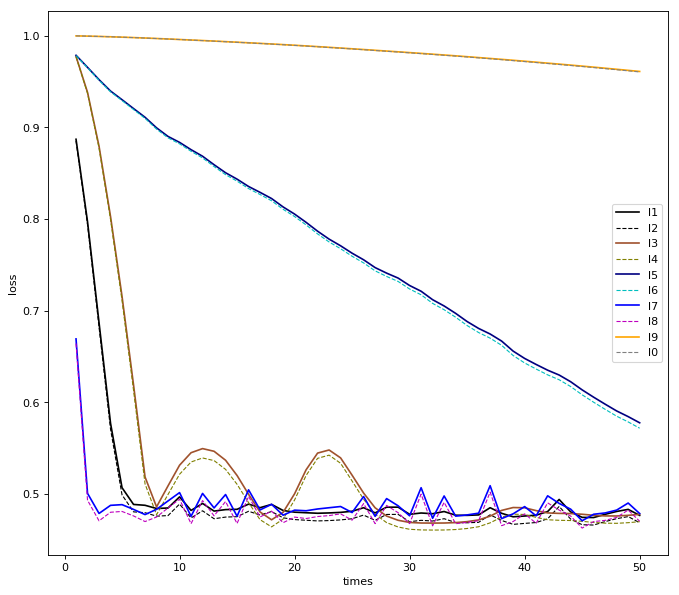

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import random
import math
dir = "./jiqixuexi/"
# get_testdata
def get_testdata():
    data = load_svmlight_file(dir + "a9a.t")
    return data[0], data[1]
# get_traindata
def get_traindata():
    data = load_svmlight_file(dir + "a9a_train.txt")
    return data[0], data[1]

# gradient
def gradient(w,x,y,rand_list):
    grad = np.zeros((124,))
    for i in rand_list:
        if (1-y[i]*np.dot(w.T,x[i].T))>0 :
            grad += w - y[i]*(x[i].T)
        if (1-y[i]*np.dot(w.T,x[i].T))<=0 :
            grad += w
    grad = (1/100)*grad
    return grad

# get_loss
def get_loss(w,x,y):
    los = 0
    for i in range(x.shape[0]):
        if (1-y[i]*np.dot(w.T,x[i].T))>0 :
            los += 1-y[i]*np.dot((w.T),(x[i].T))
        if (1-y[i]*np.dot(w.T,x[i].T))<=0 :
            los += 0
    return (1/x.shape[0])*(0.5*np.dot((w.T),w)+los)

X_train,y_train = get_traindata()
X_test,y_test = get_testdata()
a = np.ones((X_train.shape[0],1))
b = np.ones((X_test.shape[0],1))
c = np.zeros((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),a))
X_test = np.column_stack((X_test.toarray(),c))
X_test = np.column_stack((X_test,b))
e=np.zeros((124,))
for i in range(124):
    e[i]=(1*math.e**(-8))
# general
loss =[]
loss_test= []
grad= np.zeros((124,))
w = np.zeros((124,))
# NAG
w2 = np.zeros((124,))
loss_NAG = []
loss_test_NAG = []
v=np.zeros((124,))
# RMSProp
w3 = np.zeros((124,))
loss_RMSProp = []
loss_test_RMSProp = []
g=np.zeros((124,))
G=np.zeros((124,))
G_e=np.zeros((124,))
# AdaDelta
w4 = np.zeros((124,))
loss_AdaDelta = []
loss_test_AdaDelta = []
g=np.zeros((124,))
t=np.zeros((124,))
t_e=np.zeros((124,))    # t+e
wt=np.zeros((124,))
G=np.zeros((124,))
G_e=np.zeros((124,))     # G+e
#Adam
k=1
w5 = np.zeros((124,))
g=np.zeros((124,))
m=np.zeros((124,))
G=np.zeros((124,))
G_e=np.zeros((124,))     # G+e
loss_Adam = []
loss_test_Adam = []
time = 50
while time>0:
    rand_list= random.sample(range(X_train.shape[0]),100)
    # general
    grad = gradient(w,X_train,y_train,rand_list)
    w = w - 0.05*grad
    loss.append(get_loss(w,X_train,y_train))
    loss_test.append(get_loss(w,X_test,y_test))
    # NAG
    v=0.9*v+0.01*gradient(w2,X_train,y_train,rand_list)
    w2=w2-v
    loss_NAG.append(get_loss(w2,X_train,y_train))
    loss_test_NAG.append(get_loss(w2,X_test,y_test))
    #RMSProp
    g=gradient(w3,X_train,y_train,rand_list)
    G = 0.9*G+(1-0.9)*(g*g)
    G_e= G + e
    for i in range(G.shape[0]):
        G_e[i]=0.001/math.sqrt(G_e[i])
    w3 = w3-G_e*(g)
    loss_RMSProp.append(get_loss(w3,X_train,y_train))
    loss_test_RMSProp.append(get_loss(w3,X_test,y_test))
    #AdaDelta
    g=gradient(w4,X_train,y_train,rand_list)
    G=0.95*G+(1-0.95)*(g*g)
    t_e=t+e
    G_e=G+e
    for i in range(G.shape[0]):
        G_e[i]=(-1)*((math.sqrt(t_e[i]))/(math.sqrt(G_e[i])))
    wt=G_e*g
    w4=w4+wt
    t=0.99*t+(1-0.99)*(wt*wt)
    loss_AdaDelta.append(get_loss(w4,X_train,y_train))
    loss_test_AdaDelta.append(get_loss(w4,X_test,y_test))
    #Adam
    g=gradient(w5,X_train,y_train,rand_list)
    m=0.8*m+(1-0.9)*g
    G=0.99*G+(1-0.999)*(g*g)
    G_e=G+e
    for i in range(G.shape[0]):
        G_e[i]=m[i]/(math.sqrt(G_e[i]))
    Alpha= 0.001*((math.sqrt(1-math.pow(0.999,k)))/(math.sqrt(1-math.pow(0.9,k))))
    w5=w5-Alpha*G_e
    loss_Adam.append(get_loss(w5,X_train,y_train))
    loss_test_Adam.append(get_loss(w5,X_test,y_test))
    k=k+1
    time = time-1;
    
x = []
for i in range(50):
    x.append(i+1)
plt.figure(figsize=(10,9), dpi=80)
l1,= plt.plot(x, loss,color='black')
l2,=plt.plot(x, loss_test, color='black', linewidth=1.0, linestyle='--')
l3,=plt.plot(x, loss_NAG, color='sienna')
l4,=plt.plot(x, loss_test_NAG, color='olive', linewidth=1.0, linestyle='--')
l5,=plt.plot(x, loss_RMSProp, color='navy')
l6,=plt.plot(x, loss_test_RMSProp, color='c', linewidth=1.0, linestyle='--')
l7,=plt.plot(x, loss_AdaDelta, color='blue')
l8,=plt.plot(x,  loss_test_AdaDelta, color='m', linewidth=1.0, linestyle='--')
l9,= plt.plot(x, loss_Adam,color='orange')
l0,=plt.plot(x, loss_test_Adam, color='gray', linewidth=1.0, linestyle='--')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend(handles=[l1, l2,l3,l4,l5,l6,l7,l8,l9,l0,], labels=['l1', 'l2','l3', 'l4','l5', 'l6','l7', 'l8','l9', 'l0'],  loc='best')
#plt.legend(loc='upper right')
plt.show()            
            